<a href="https://colab.research.google.com/github/rishisg/ChatGPT/blob/main/Assignment_K_Means_Clustering_Customer_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None

Dataset Head:
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                    

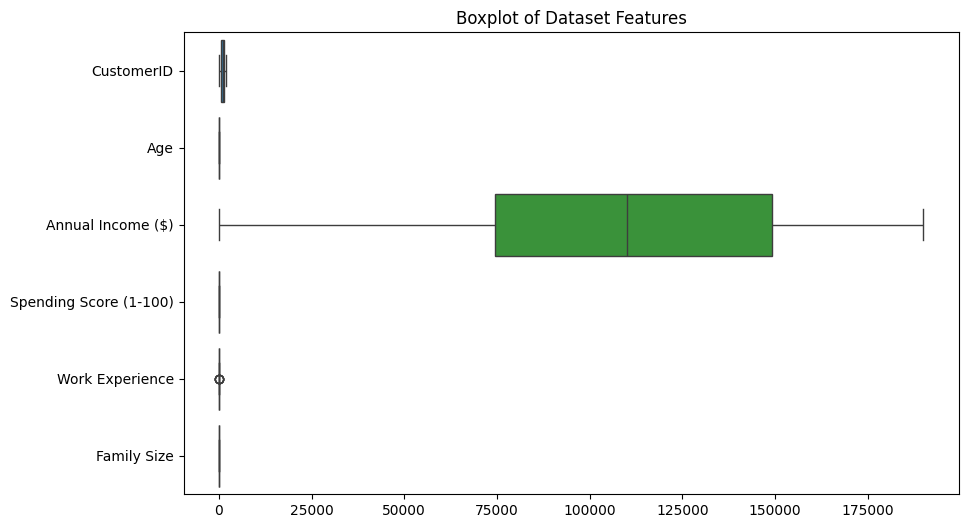

Non-numeric columns: Index(['Profession'], dtype='object')


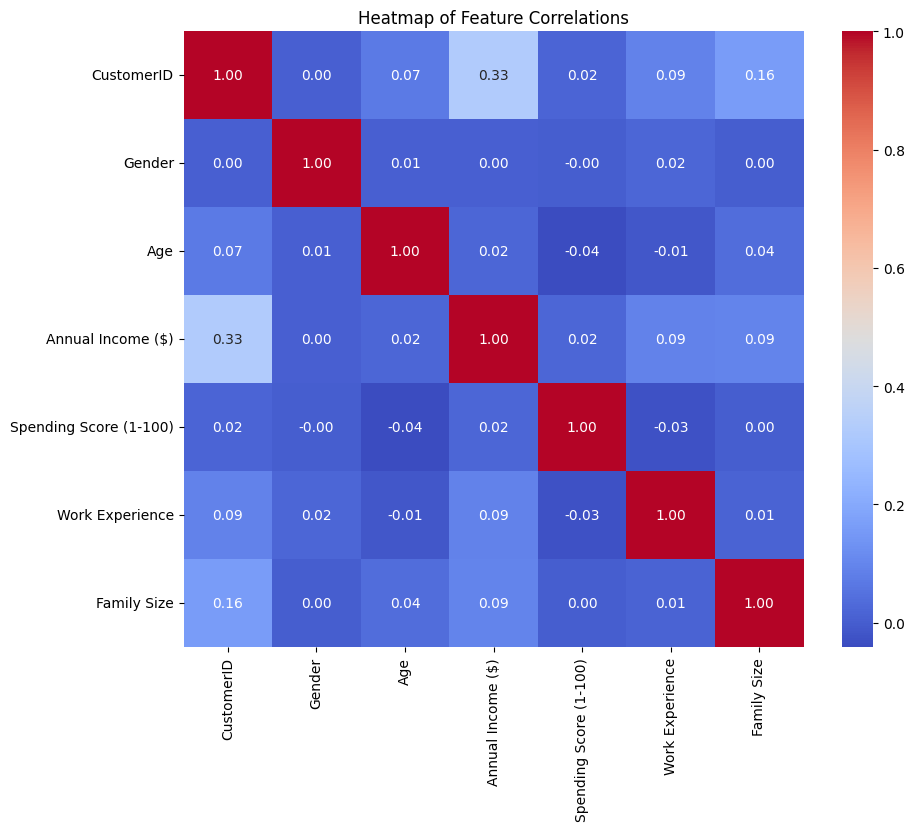

Categorical columns: Index(['Profession'], dtype='object')
   CustomerID    Gender       Age  Annual Income ($)  Spending Score (1-100)  \
0   -1.731185  1.207064 -1.054089          -2.093501               -0.428339   
1   -1.729453  1.207064 -0.983723          -1.656133                1.075546   
2   -1.727721 -0.828457 -1.018906          -0.540845               -1.609962   
3   -1.725989 -0.828457 -0.913356          -1.131292                0.932319   
4   -1.724257 -0.828457 -0.631891          -1.590528               -0.392532   

   Profession  Work Experience  Family Size  
0    0.778356        -0.791207     0.117497  
1   -0.354347        -0.281162    -0.390051  
2   -0.354347        -0.791207    -1.405148  
3    1.533491        -1.046230    -0.897599  
4    0.023220        -0.536185     1.132594  


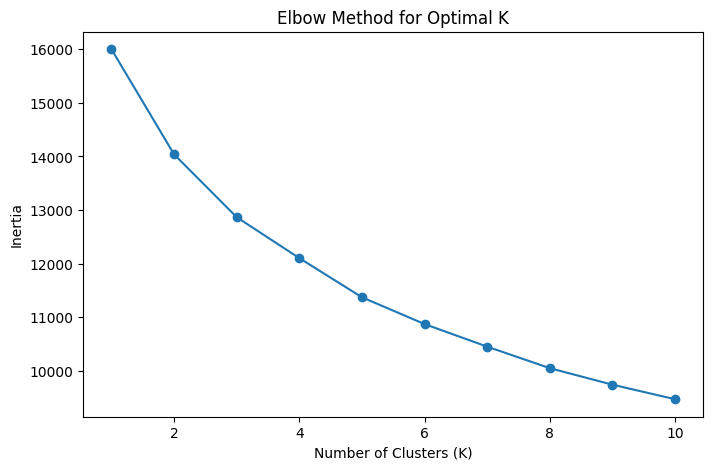

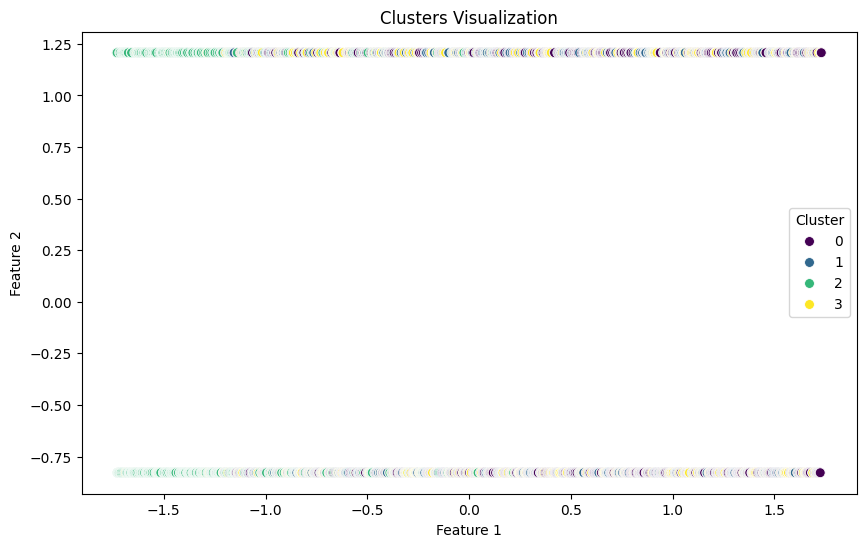

Silhouette Score for K=4: 0.11

Cluster Analysis:
          CustomerID    Gender        Age  Annual Income ($)  \
Cluster                                                        
0        1251.499142  0.375643  76.855918      122079.006861   
1        1195.835644  0.439604  21.299010      129435.661386   
2         322.815451  0.392704  43.304721       62402.049356   
3        1159.298206  0.426009  49.724215      125217.977578   

         Spending Score (1-100)  Profession  Work Experience  Family Size  
Cluster                                                                    
0                     54.325901    1.627787         3.915952     4.173242  
1                     61.023762    1.857426         4.324752     3.861386  
2                     48.881974    2.680258         3.248927     2.708155  
3                     37.347534    6.145740         4.986547     4.242152  
Clustered data saved to 'clustered_data.csv'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Setup and Data Preparation
# Load the dataset
data_url = "/content/Customers.csv"
data = pd.read_csv(data_url)

# Display basic information about the dataset
print("Dataset Overview:")
print(data.info())
print("\nDataset Head:")
print(data.head())

# Step 2: Data Exploration
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Handling missing values (if any)
#data.fillna(data.mean(), inplace=True)

# Statistical summary of numerical features
print("\nStatistical Summary:")
# Handling missing values for numerical columns only
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())
print(data.describe())

# Exploratory visualizations
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient="h")
plt.title("Boxplot of Dataset Features")
plt.show()

#sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
#plt.title("Heatmap of Feature Correlations")
#plt.show()

# Encode categorical variables (example for a 'Gender' column)
if 'Gender' in data.columns:
    data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})

# Check for other non-numeric columns and handle them appropriately
non_numeric_cols = data.select_dtypes(exclude=[float, int]).columns
print(f"Non-numeric columns: {non_numeric_cols}")

# Drop non-numeric columns for correlation matrix, or convert them as needed
data_numeric = data.select_dtypes(include=[float, int])

# Compute and plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()

# Step 3: Preprocessing and Parameter Selection
# Selecting features for clustering
features = data.iloc[:, 1:]

# Standardizing the data
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)

# Step 1: Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols}")

# Step 2: Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Step 3: Extract features for scaling
features = data.drop(columns=['TargetColumn'], errors='ignore')  # Replace 'TargetColumn' with the actual target column if it exists
numeric_features = features.select_dtypes(include=['float64', 'int64'])

# Step 4: Standardize the numeric features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Convert scaled features back to a DataFrame for easier handling
scaled_features_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)

# Proceed with clustering
print(scaled_features_df.head())

# Step 4: Determine Optimal K Using Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Step 5: Perform K-Means Clustering
optimal_k = 4  # Replace with the optimal K determined from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the dataset
data["Cluster"] = kmeans.labels_

# Step 6: Result Analysis
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=kmeans.labels_,
    palette="viridis",
    s=50
)
plt.title("Clusters Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend(title="Cluster")
plt.show()

# Step 7: Evaluation and Iteration
sil_score = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score for K={optimal_k}: {sil_score:.2f}")

# Step 8: Interpretation and Conclusion
# Analyze cluster characteristics
print("\nCluster Analysis:")
print(data.groupby("Cluster").mean())

# Save clustered dataset
data.to_csv("clustered_data.csv", index=False)
print("Clustered data saved to 'clustered_data.csv'")
